In [1]:
import walk
from experiment import MultipleExperiment
import tests
import fitter_local
import pandas as pd
import matplotlib.pyplot as plt
from fitter import Fitter
import scipy.stats as stats

In [2]:
def wf(n):
    return 1/(n+1)**10

test = MultipleExperiment(walk.SelfInteractingRandomWalk, n_trials=1000, length=100000, weight_function=wf)
test.run()

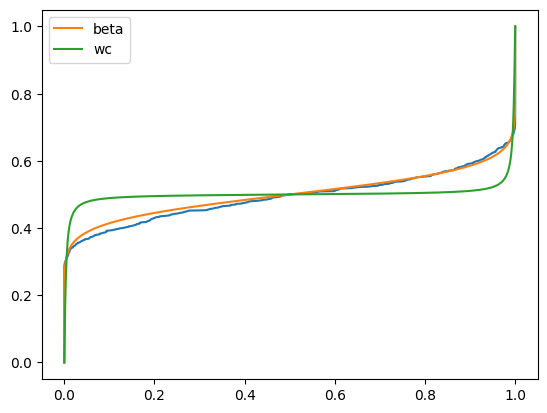

In [3]:
f = fitter_local.MultiFitter(test.stats['ta0'])
f.fit('trf')
f.plot()

Fitting 110 distributions:  24%|██▎       | 26/110 [00:05<00:38,  2.17it/s]C:\Users\Lei\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:3485: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  t1 = integrate.quad(llc, -np.inf, x)[0]
C:\Users\Lei\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:3485: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
C:\Users\Lei\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:4355: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(llc, _a, x)[0]
Fitting 110 distributions:  75%|███████▍  | 82/1

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
levy_l,1238.874385,407.897311,228.018723,inf,0.420354,1.137948e-160
levy,1344.187051,361.345481,309.604918,inf,0.407390,1.604016e-150
fisk,1367.564173,352.564329,333.754447,inf,0.327989,2.586516e-96
invgauss,1407.781837,330.775038,362.738566,inf,0.404307,3.656080e-148
beta,1520.793109,233.042429,446.863002,inf,0.283083,2.149203e-71


C:\Users\Lei\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\Lei\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


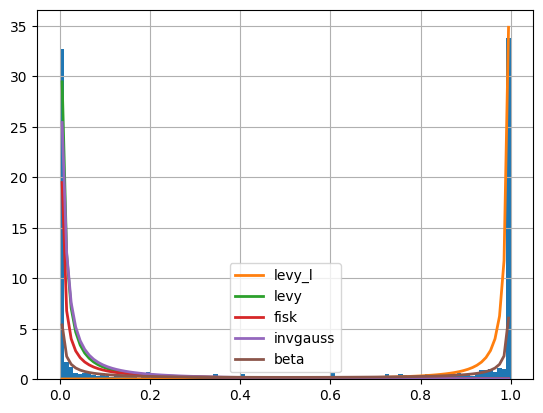

In [4]:
f2 = Fitter(test.stats['ta0'])
f2.fit()
f2.summary()

In [7]:
stats.cramervonmises(test.stats['ta0'], 'beta', args=(0.5, 0.5))

CramerVonMisesResult(statistic=33.2116450679824, pvalue=3.876094778476613e-09)

In [ ]:
f2= fitter.BetaFitter(test2.stats['ta0'])
f2.fit([0.15], 'trf')
f2.plot(100)
plt.plot(f2.x, f2.func_beta(f2.x, .346574),label = '.346574')
plt.plot(f2.x, f2.func_beta(f2.x, *f2.params), label='fit')
plt.plot(f2.x, f2.y, label = 'empirical')
plt.legend()